In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import joblib
import shap
from sklearn.model_selection import cross_validate, train_test_split
from data import update_game
from model.model import update_models, update_model_scores, elasticnet, linear_svr, stacking, xgb
from model.rbf import model, column_transformer, CATEGORICAL_FEATURES, NUMERICAL_FEATURES, LIST_FEATURES, DICT_FEATURES
from model.core import load_Xy

In [4]:
#update_models()
update_model_scores()

C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


In [ ]:
update_game(
    metacritic_url='https://www.metacritic.com/game/avowed/',
    title=None,
    #title='Rabi-Ribi',
    classic=False,
)

In [4]:
xgb_model = joblib.load('model/models/xgb_model.joblib')

In [5]:
preprocessor = xgb_model.named_steps['preprocess']
rgr = xgb_model.named_steps['rgr']

In [6]:
X, y = load_Xy()

In [7]:
X_trans = pd.DataFrame(data=preprocessor.transform(X), columns=preprocessor.get_feature_names_out())

In [8]:
explainer = shap.TreeExplainer(rgr)

In [9]:
shap_values = explainer.shap_values(X_trans, check_additivity=False)

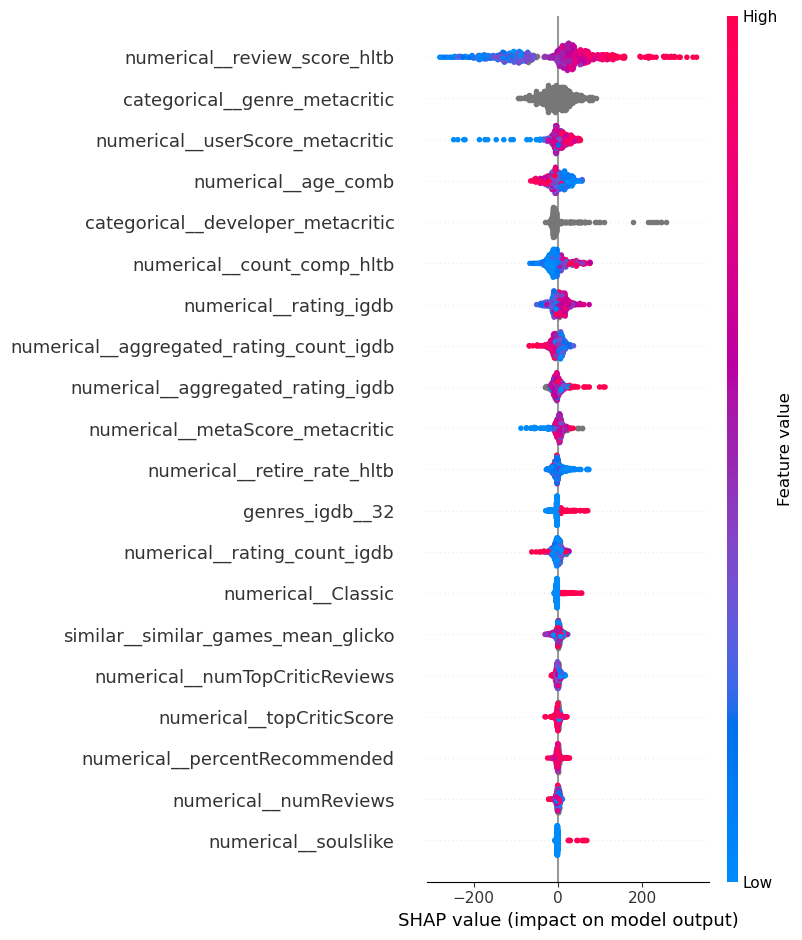

In [11]:
shap.summary_plot(shap_values, X_trans)

In [97]:
def richard_curve(t, a=0, k=1, b=0.009, v=1, q=1000, c=1):
    return a + (k-a)/((c + q * np.e ** (-b * t)) ** (1/v))

In [99]:
richard_curve((pd.Timestamp.now() - pd.to_datetime(df.last_played, errors='coerce')).dt.days)

0      NaN
1      1.0
2      1.0
3      NaN
4      NaN
      ... 
573    NaN
574    NaN
575    NaN
576    NaN
577    NaN
Name: last_played, Length: 578, dtype: float64

In [79]:
df = pd.read_csv('game_log.csv')

<Axes: >

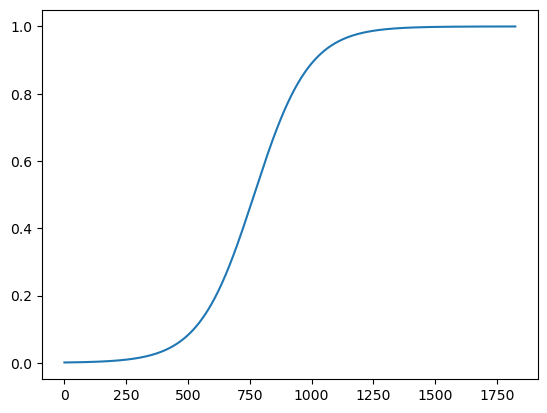

In [78]:
A = 0
K = 1
Q = 1000
B = 0.009
V = 1
pd.Series({n: richard_curve(t=n, a=A, k=K, b=B, v=V, q=Q) for n in np.arange(0, 365*5)}).plot()